<a href="https://colab.research.google.com/github/annaklaracss/pca_tratamento-de-dados/blob/main/PCA_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['target']].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(9)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa


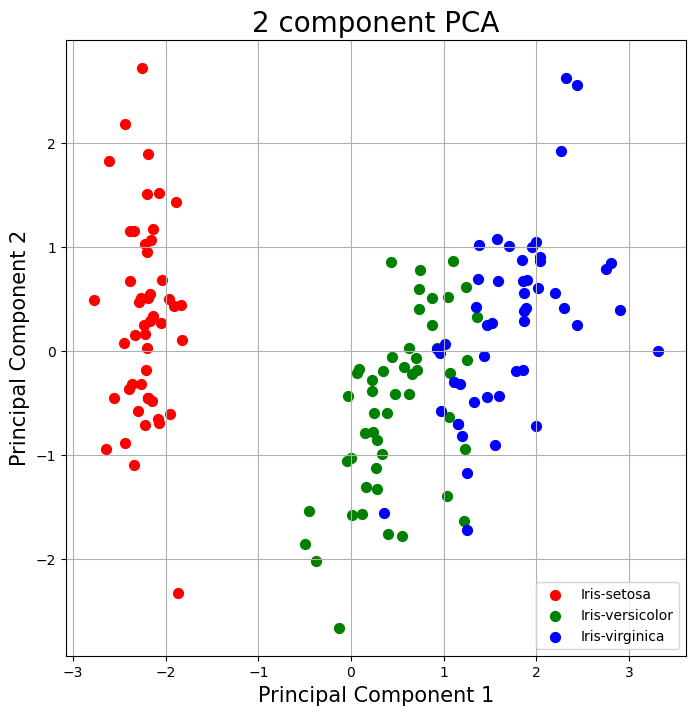

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
#PCA Em 3D
pca = PCA(n_components=3)
scores = pca.fit_transform(x)
loadings = pca.components_.T

explained = pca.explained_variance_ratio_ * 100

In [ ]:
scores_scaled = scores / np.max(np.abs(scores))
loadings_scaled = loadings / np.max(np.abs(loadings)) * 0.5

NameError: name 'X' is not defined

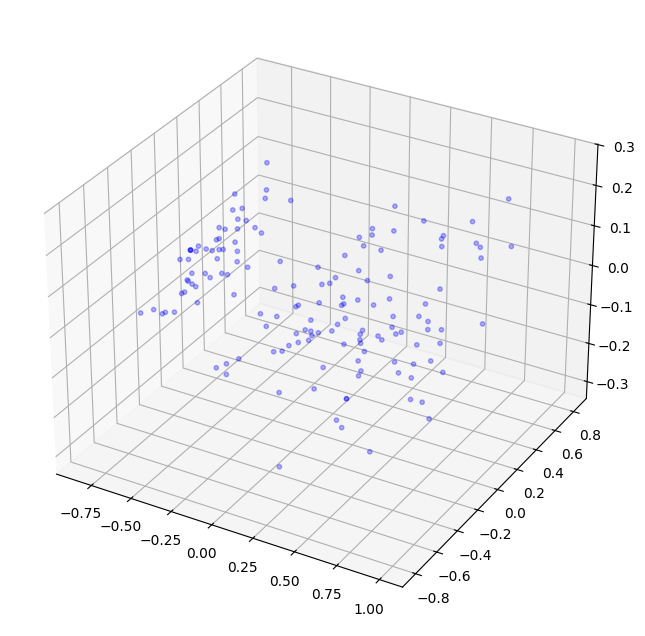

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scores_scaled[:,0], scores_scaled[:,1], scores_scaled[:,2], color="blue", alpha=0.3, s=10)

for i, var in enumerate(X.columns):
    ax.plot([0, loadings_scaled[i,0]], [0, loadings_scaled[i,1]], [0, loadings_scaled[i,2]], color='red', linewidth=1.5)
    ax.text(loadings_scaled[i,0]*1.1, loadings_scaled[i,1]*1.1, loadings_scaled[i,2]*1.1, str(var), color='black', fontsize=9)

ax.set_xlabel(f"Componente Principal 1")
ax.set_ylabel(f"Componente Principal 2")
ax.set_zlabel(f"Componente Principal 3")
ax.set_title("Biplot PCA 3D: Scores (cidades) e Loadings (variáveis)")

plt.show()